In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [4]:
input_file=('cadence_field1000.csv')

In [6]:
df=pd.read_csv(input_file)

In [21]:
df1=df[['nights','filter']]

In [9]:
df.head()

,Unnamed: 0,nights,expdate,expmjd,airmass,filter
0,0,173,14965194,59753.208268,1.370996,g
1,1,173,14966692,59753.225609,1.274001,g
2,2,189,16353504,59769.276675,1.025141,z
3,3,189,16355480,59769.299544,1.012049,z
4,4,190,16439213,59770.268672,1.030291,y


In [43]:
df1

,nights,filter
0,173,g
1,173,g
2,189,z
3,189,z
4,190,y
5,193,y
6,193,y
7,193,y
8,197,y
9,197,y


In [24]:
nbins=df1.nights.max()-df1.nights.min()

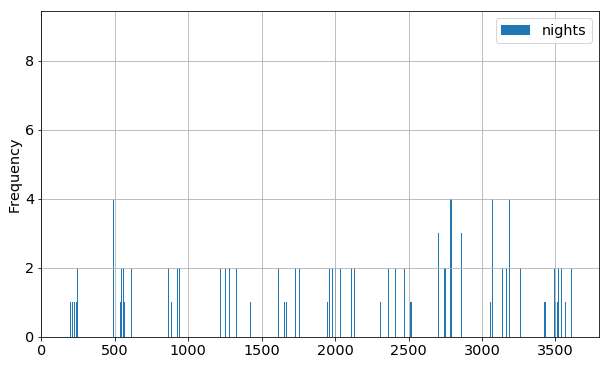

In [31]:
df1.plot.hist('nights',bins=nbins,grid=True)

TypeError: object of type 'bool' has no len()

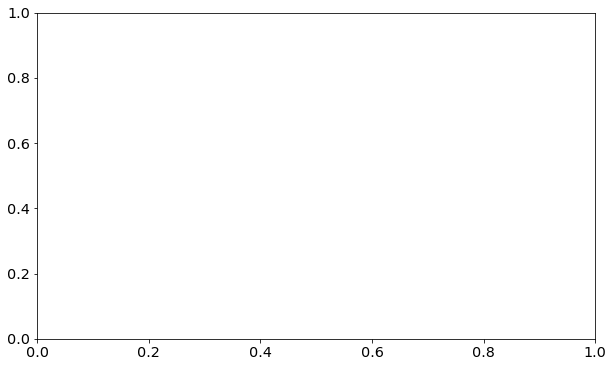

In [42]:
df1.plot.hist('filter',filter=='u')

In [40]:
df1['nights'][filter=='g'].plot.hist(bins=nbins,grid=True)

KeyError: False

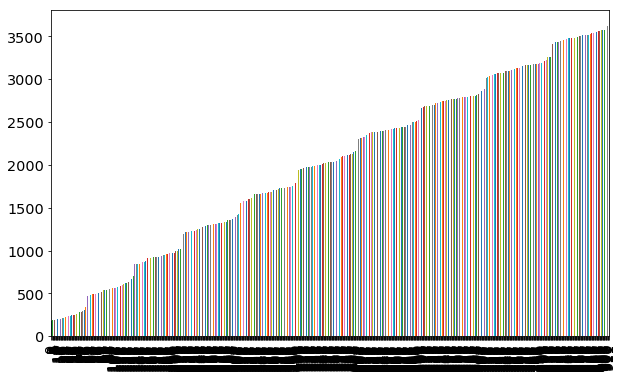

In [37]:
df1['nights'].plot.bar()

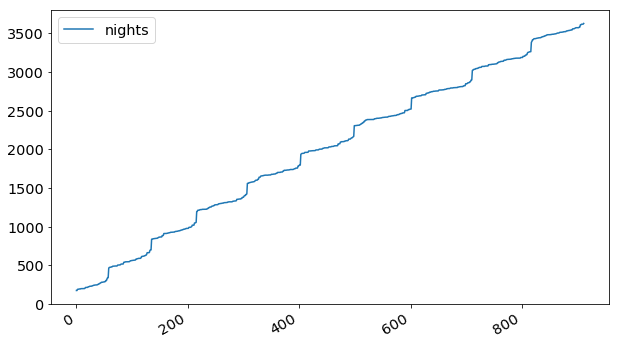

In [35]:
df1.plot(subplots=True);